# Подключение нужных библиотек и загрузка данных


In [353]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [354]:
df = pd.read_csv('Lung_cancer.csv')

In [355]:
def set_size():
    plt.figure(figsize=(20,7))

# Анализ данных

In [356]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [358]:
df.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [359]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Нулевых значений нет

# Обработка данных

In [360]:
duplicates = df[df.duplicated()].shape[0]
df.drop_duplicates(keep='first', inplace=True)

In [361]:
for column in df.columns:
    df[column] = df[column].replace(1, 0)
    df[column] = df[column].replace(2, 1)

In [362]:
for column in df.columns:
    df[column] = df[column].replace('YES', 1)
    df[column] = df[column].replace('NO', 0)

In [363]:
df['GENDER'] = df['GENDER'].replace('M', 0)
df['GENDER'] = df['GENDER'].replace('F', 1)

In [364]:
df_gr = df.copy()
for column in df_gr.columns:
    df_gr[column] = df_gr[column].replace(1, 'YES')
    df_gr[column] = df_gr[column].replace(0, 'NO')
df_gr['GENDER'] = df_gr['GENDER'].replace({'NO': 'MALE', 'YES': 'FEMALE'})

In [365]:
df_pos = df_gr[df_gr['LUNG_CANCER'] == 'YES'] 
df_neg = df_gr[df_gr['LUNG_CANCER'] == 'NO']

# Визуализация данных


Text(139.25, 0.5, 'Количество')

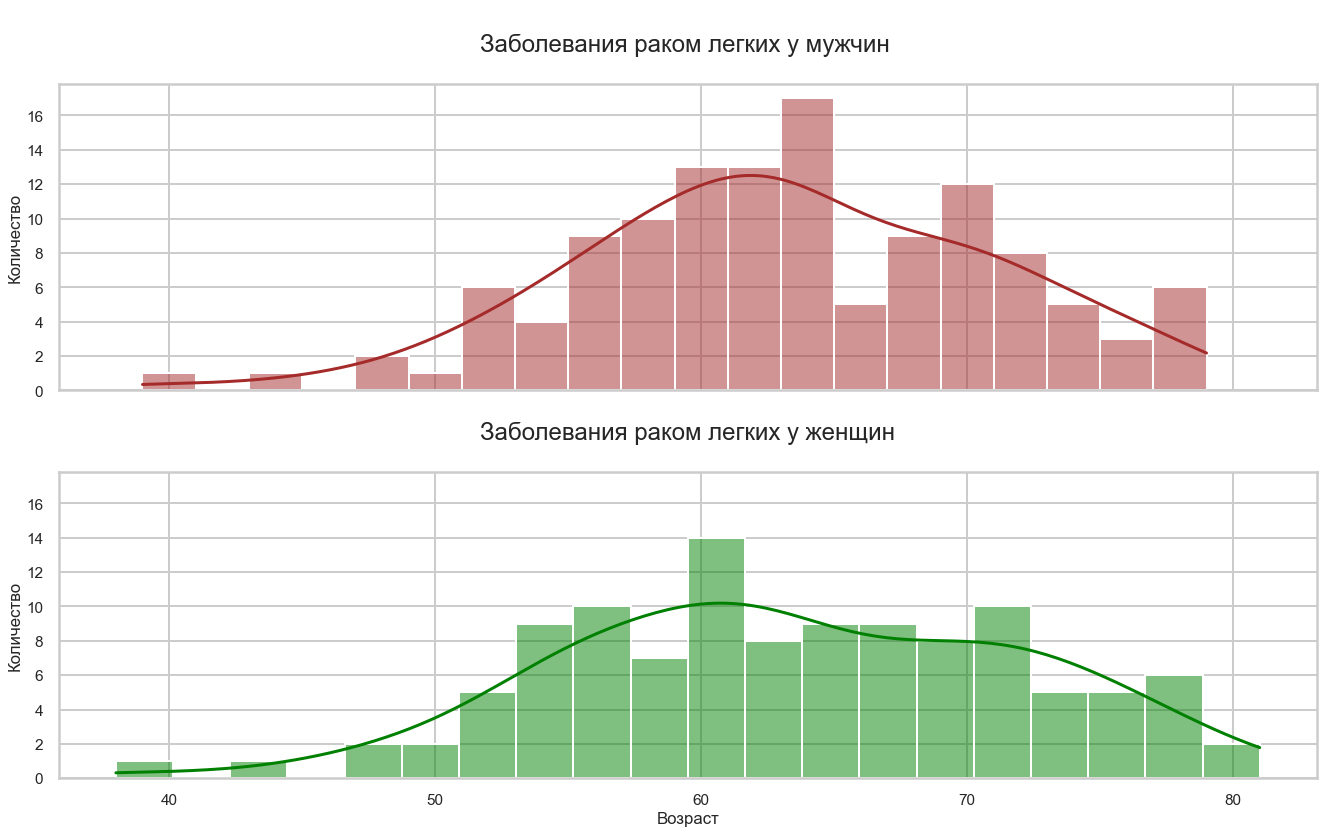

In [366]:
_, axs = plt.subplots(2,1,figsize=(20,12), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data = df_pos[df_pos['GENDER'] == 'MALE']['AGE'], color='brown', bins=20, ax = axs[0], kde=True)
axs[0].set_title("\nЗаболевания раком легких у мужчин \n", fontsize=24)
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Количество')

sns.histplot(df_pos[df_pos['GENDER'] == 'FEMALE']['AGE'], color='green', bins=20, ax = axs[1], kde=True)
axs[1].set_title("\nЗаболевания раком легких у женщин\n", fontsize=24)
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Количество')


Text(784.7272727272725, 0.5, 'Количество')

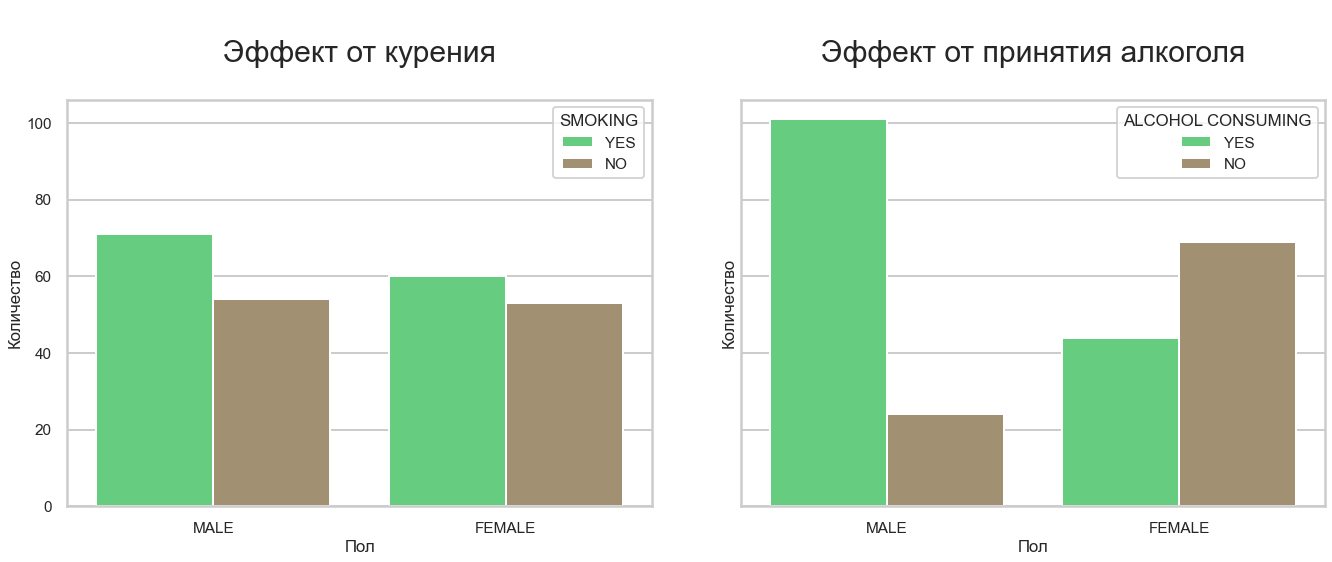

In [367]:
_, axs = plt.subplots(1,2,figsize=(20,8), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)


sns.countplot(data = df_pos, x='GENDER', hue='SMOKING', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[0])
axs[0].set_title("Эффект от курения\n", fontsize=30)
axs[0].set_xlabel('Пол')
axs[0].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='ALCOHOL CONSUMING', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[1])
axs[1].set_title("\nЭффект от принятия алкоголя\n", fontsize=30)
axs[1].set_xlabel('Пол')
axs[1].set_ylabel('Количество')


Text(1099.5862068965519, 0.5, 'Количество')

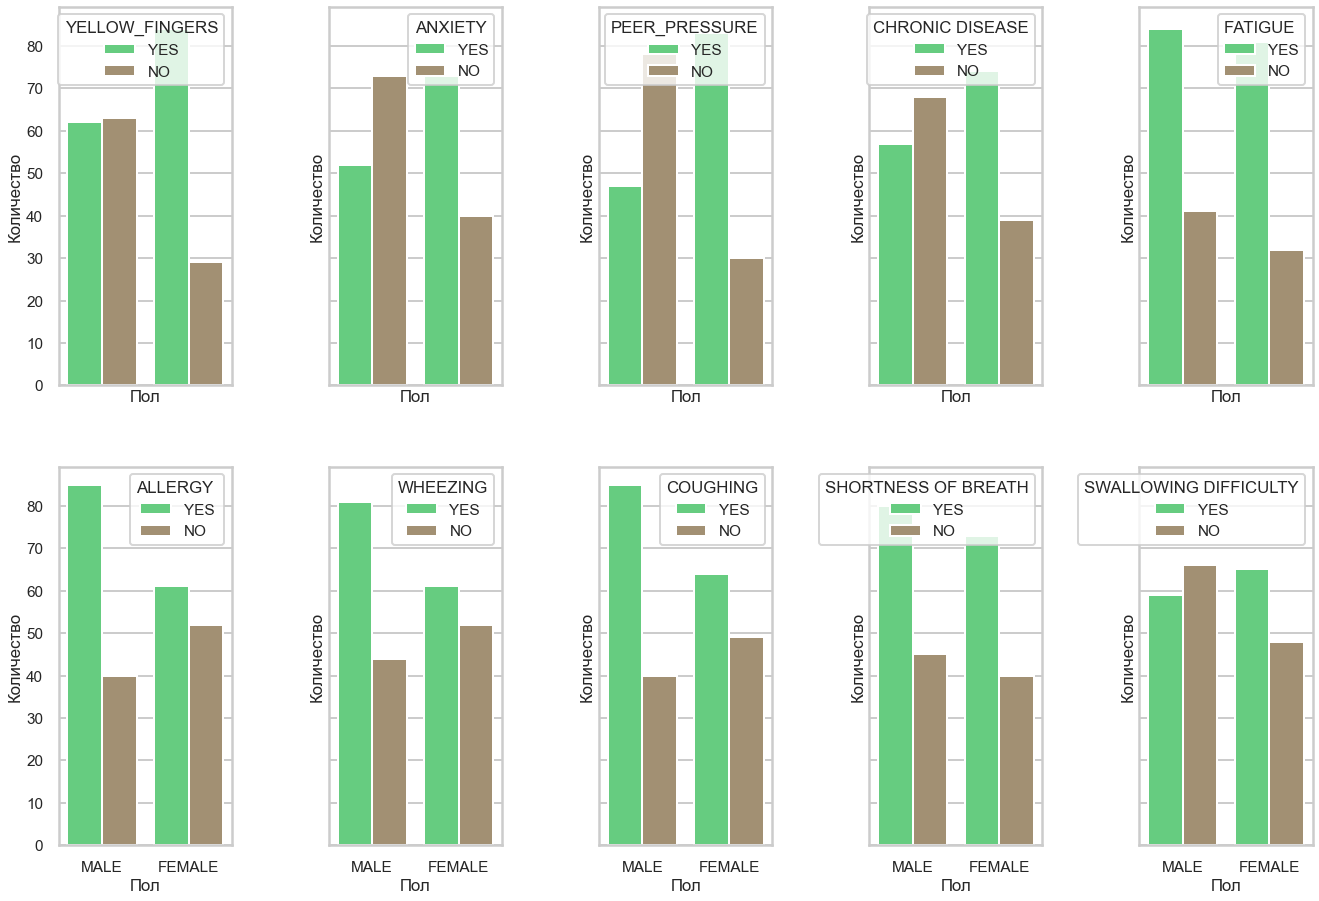

In [368]:
_, axs = plt.subplots(2,5,figsize=(20,14), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data = df_pos, x='GENDER', hue='YELLOW_FINGERS', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[0,0])
axs[0,0].set_xlabel('Пол')
axs[0,0].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='ANXIETY', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[0,1])
axs[0,1].set_xlabel('Пол')
axs[0,1].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='PEER_PRESSURE', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[0,2])
axs[0,2].set_xlabel('Пол')
axs[0,2].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='CHRONIC DISEASE', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[0,3])
axs[0,3].set_xlabel('Пол')
axs[0,3].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='FATIGUE ', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[0,4])
axs[0,4].set_xlabel('Пол')
axs[0,4].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='ALLERGY ', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[1,0])
axs[1,0].set_xlabel('Пол')
axs[1,0].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='WHEEZING', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[1,1])
axs[1,1].set_xlabel('Пол')
axs[1,1].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='COUGHING', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[1,2])
axs[1,2].set_xlabel('Пол')
axs[1,2].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='SHORTNESS OF BREATH', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[1,3])
axs[1,3].set_xlabel('Пол')
axs[1,3].set_ylabel('Количество')

sns.countplot(data = df_pos, x='GENDER', hue='SWALLOWING DIFFICULTY', hue_order=['YES', 'NO'], palette = 'terrain', ax = axs[1,4])
axs[1,4].set_xlabel('Пол')
axs[1,4].set_ylabel('Количество')

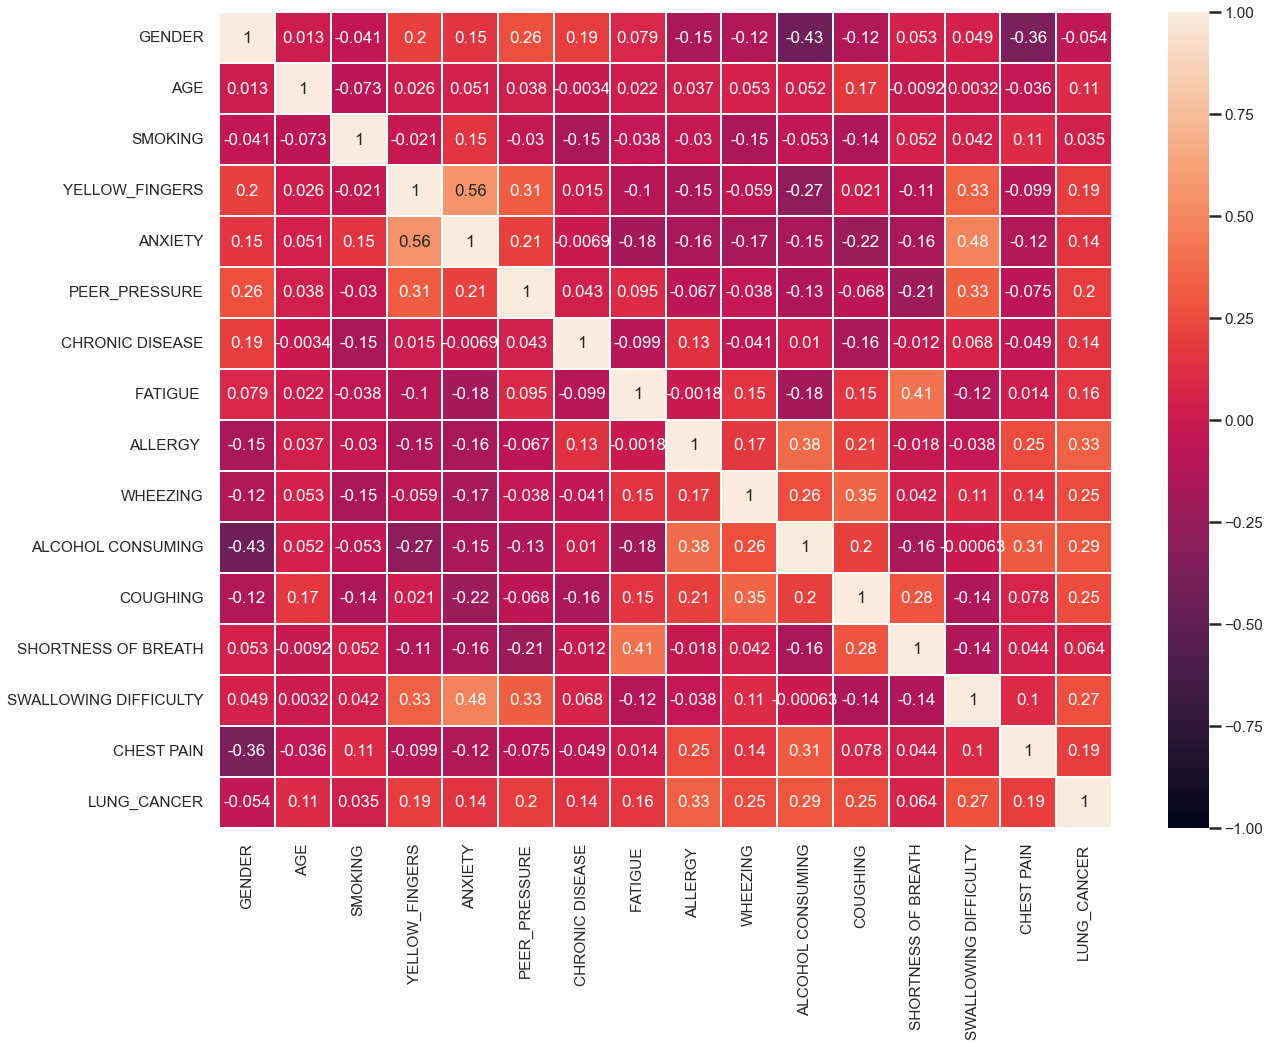

In [369]:
plt.subplots(figsize =(20, 15))

sns.heatmap(df.corr(), annot=True, vmin=-1, linewidths=0.1)

plt.show()

# Чистка данных

In [370]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [371]:
df.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.485507,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Как можно увидеть, пропусков и выбросов в датасете нет, поэтому данный этап можно пропустить

# Обучение модели

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [383]:
target = df['LUNG_CANCER']
predictors = df.drop(['LUNG_CANCER'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.7, random_state=0)

In [384]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
score_lg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(score_lg)

91.75


In [385]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
score_dt = round(accuracy_score(y_pred, y_test) * 100, 2)
print(score_dt)

85.57


In [386]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
score_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
print(score_rf)

90.72


In [387]:
models = pd.DataFrame({'Модель': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier'],
                      'Счет(в процентах)': [score_lg, score_dt, score_rf]})

In [388]:
models.sort_values(by='Счет(в процентах)', ascending=False)

,Модель,Счет(в процентах)
0,LogisticRegression,91.75
2,RandomForestClassifier,90.72
1,DecisionTreeClassifier,85.57
